https://twitter.com/ysmemoirs/status/1544957417678864384

In [1]:
using Distributions
using StatsPlots
default(fmt=:png, titlefontsize=10, tickfontsize=6)

function _likelihood(w, r; a=43, b=7, c=24, d=26, W=5000, R=1000)
    a+b ≤ w+r || return 0.0
    c+d ≤ W+R-(w+r) || return 0.0
    hgA = Hypergeometric(w, r, a+b)
    hgB = Hypergeometric(W-w, R-r, c+d)
    likA = pdf(hgA, a)
    likB = pdf(hgB, c)
    likA * likB
end

function calculate_likelihoods(; a=43, b=7, c=24, d=26, W=5000, R=1000)
    lik = Matrix{Float64}(undef, W+1, R+1)
    Ws, Rs = 0:W, 0:R 
    Threads.@threads for j in eachindex(Rs)
        for i in eachindex(Ws)
            lik[i, j] = _likelihood(Ws[i], Rs[j]; a, b, c, d, W, R)
        end
    end
    (; lik, Ws, Rs)
end

function plot_likelihoods(f = identity;
        a=43, b=7, c=24, d=26, W=5000, R=1000,
        ws=0:W, rs=0:R, color=:CMRmap, colorbar=true,
        plot_line=false, plot_contourf=false, 
        title="", kwargs...)
    (; lik, Ws, Rs) = calculate_likelihoods(; a, b, c, d, W, R)
    xidx, yidx = 1 .+ ws, 1 .+ rs
    if plot_contourf
        contourf(Ws[xidx], Rs[yidx], f.(lik[xidx, yidx])'; color, colorbar)
    else
        heatmap(Ws[xidx], Rs[yidx], f.(lik[xidx, yidx])'; color, colorbar)
    end
    plot_line && plot!(x -> (d/c)*(x - (W-c)) + (R-d); label="", c=:cyan)
    plot!(xlim=extrema(Ws[xidx]), ylim=extrema(Rs[yidx]))
    title!(title)
    plot!(; kwargs...)
end

plot_likelihoods (generic function with 2 methods)

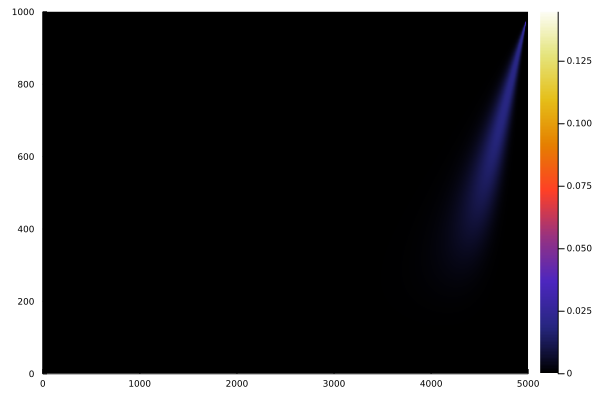

In [2]:
plot_likelihoods()

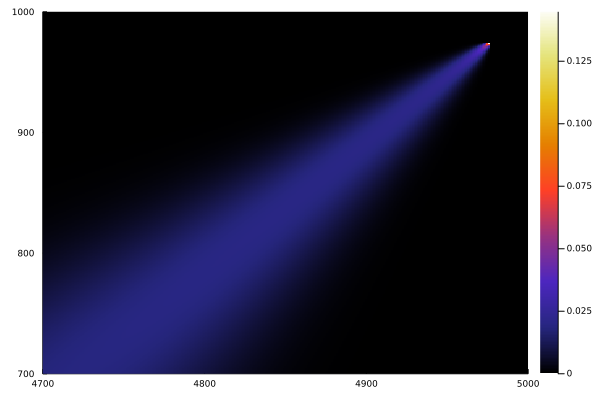

In [3]:
plot_likelihoods(ws=4700:5000, rs=700:1000)

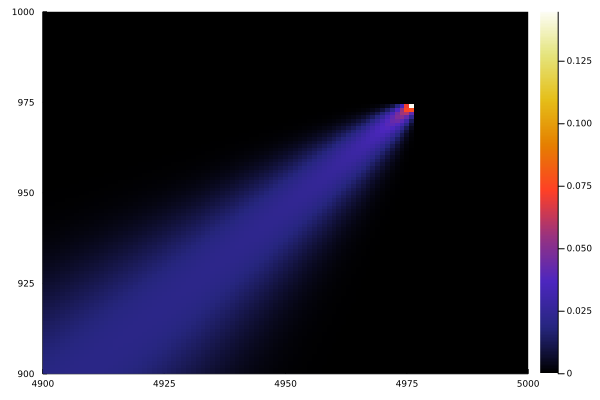

In [4]:
plot_likelihoods(ws=4900:5000, rs=900:1000)

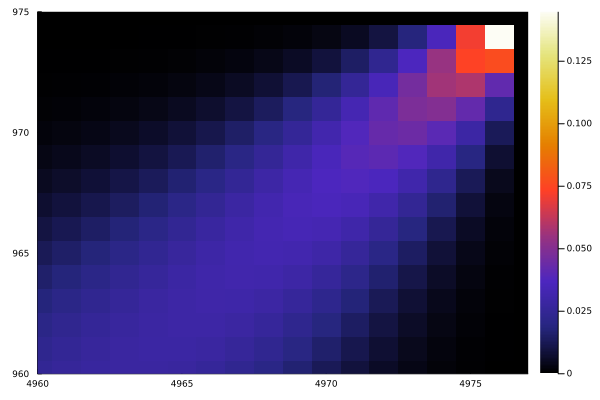

In [5]:
plot_likelihoods(ws=4960:4977, rs=960:975)

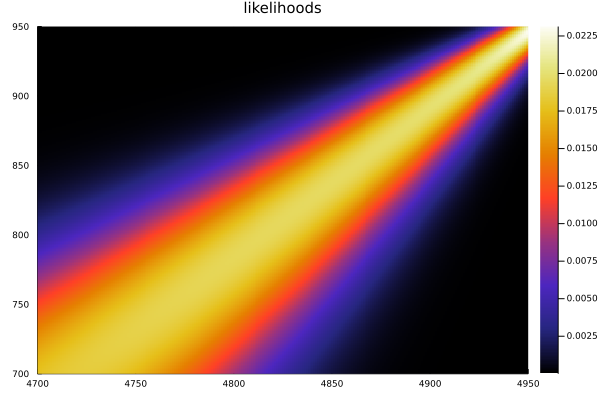

In [6]:
plot_likelihoods(ws=4700:4950, rs=700:950, title="likelihoods")

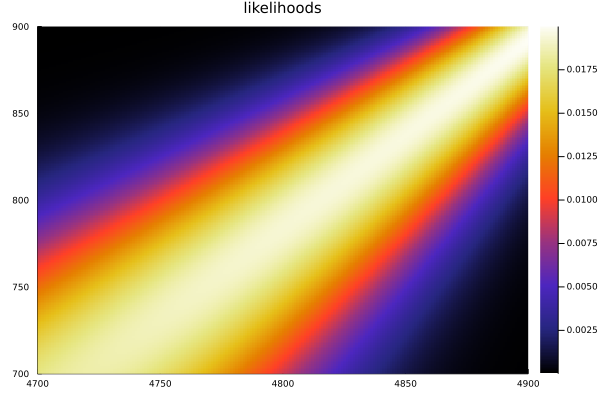

In [7]:
plot_likelihoods(ws=4700:4900, rs=700:900, title="likelihoods")

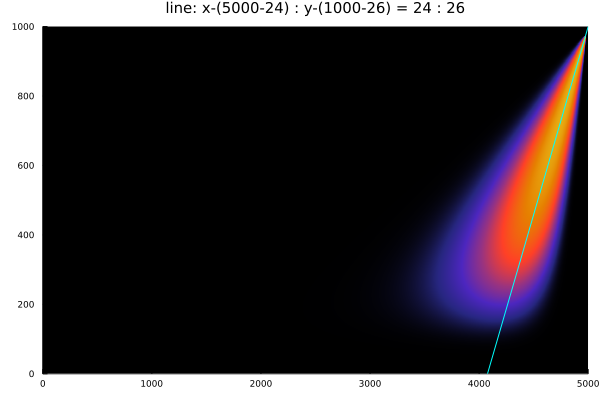

In [8]:
plot_likelihoods(p -> log(p + 1e-4); colorbar=false,
    plot_line=true, title="line: x-(5000-24) : y-(1000-26) = 24 : 26")

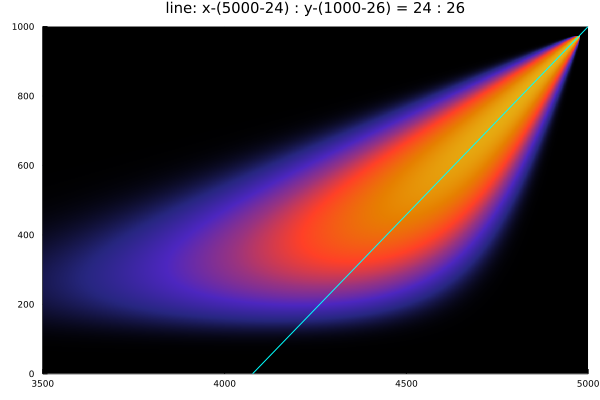

In [9]:
plot_likelihoods(p -> log(p + 1e-4); ws=3500:5000, colorbar=false,
    plot_line=true, title="line: x-(5000-24) : y-(1000-26) = 24 : 26")

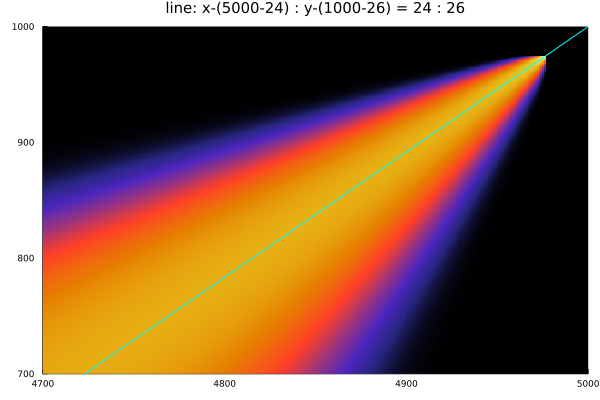

In [10]:
plot_likelihoods(p -> log(p + 1e-4); ws=4700:5000, rs=700:1000, colorbar=false,
    plot_line=true, title="line: x-(5000-24) : y-(1000-26) = 24 : 26")

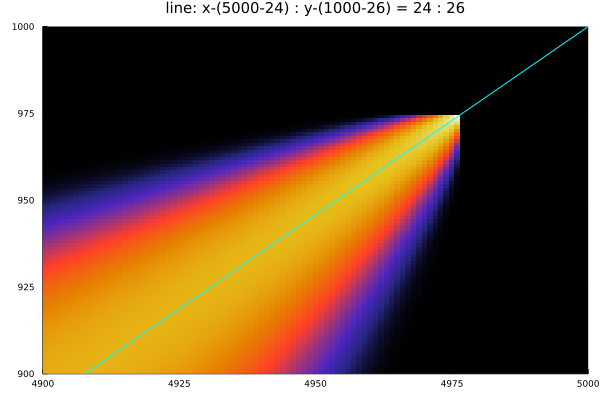

In [11]:
plot_likelihoods(p -> log(p + 1e-4); ws=4900:5000, rs=900:1000, colorbar=false,
    plot_line=true, title="line: x-(5000-24) : y-(1000-26) = 24 : 26")